In [2]:
import JuliaCompare as J
import PromulaDBA as P
import JuliaCompare: db_files, Canada
using CSV, DataFrames, DataFramesMeta

BASE_FOLDER = raw"\\Silver\c\2020CanadaWalnut"
BASE_FOLDER2 = raw"\\Silver\c\24.11.15 2020CanadaWalnut"
SCENARIO1 = "StartBase"
SCENARIO2 = "StartBase"

CODE_FOLDER = joinpath(BASE_FOLDER, "Engine")
DATA_FOLDER1 = joinpath(BASE_FOLDER, "2020Model", SCENARIO1)
DATA_FOLDER2 = joinpath(BASE_FOLDER2, "2020Model", SCENARIO2)
E2020_Folder = joinpath(BASE_FOLDER, "2020Model")

vars = J.list_vars(CODE_FOLDER, DATA_FOLDER1, db_files);
loc1 = J.Loc_p(vars, DATA_FOLDER1, "Updated");
loc2 = J.Loc_p(vars, DATA_FOLDER2, "Official");

cfilename is: 2020DB cfile is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\2020db.dba
cfilename is: CCalDB cfile is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\Cinput.dba
cfilename is: CInput cfile is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\Cinput.dba
cfilename is: COutput cfile is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\Cinput.dba
cfilename is: ECalDB cfile is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\Einput.dba
cfilename is: EGCalDB cfile is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\Einput.dba
cfilename is: EGInput cfile is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\Einput.dba
cfilename is: EGOutput cfile is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\Einput.dba
cfilename is: EInput cfile is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\Einput.dba
cfilename is: EOutput cfile is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\Einput.dba
cfilename is: ICalDB cfile is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\Iinput.dba
cfil

fname is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\SOutput.dba
fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\SOutput.dba


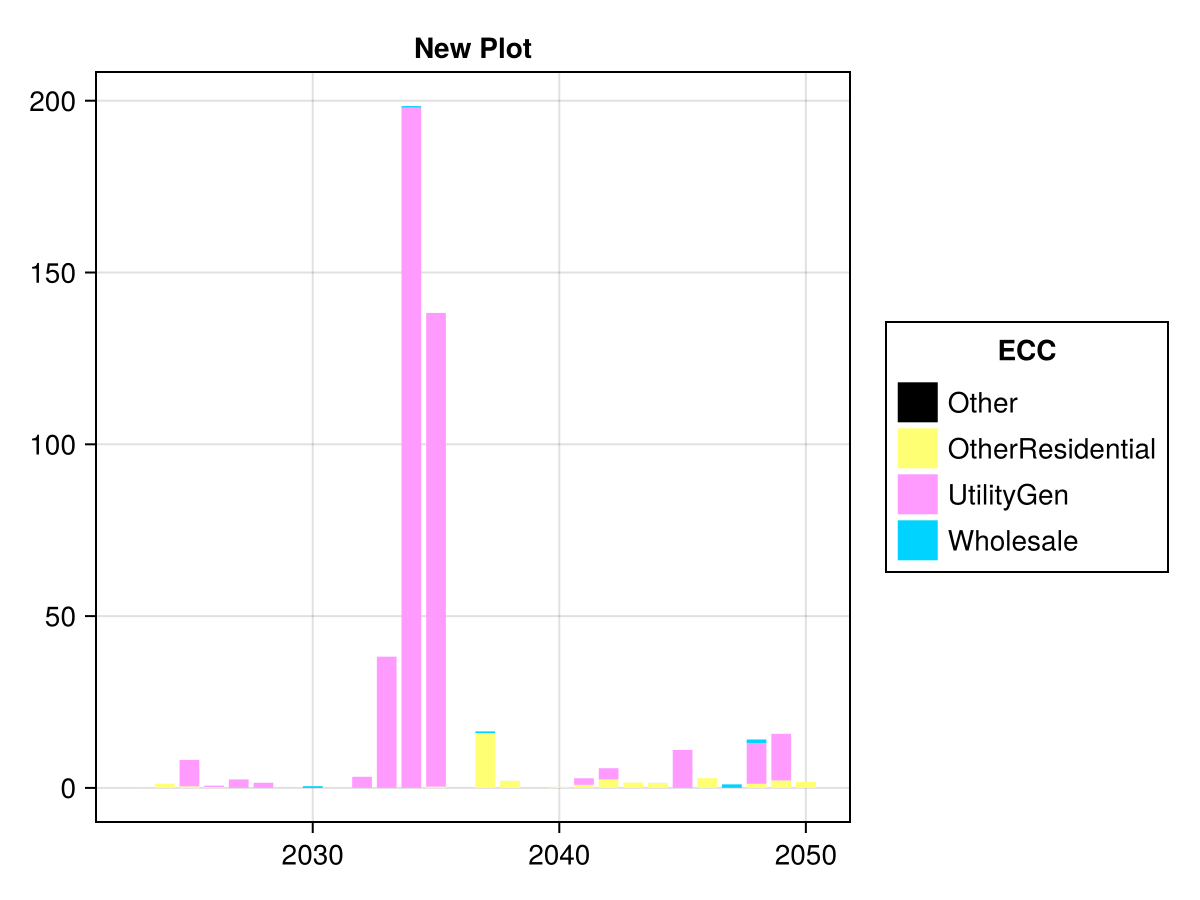

CairoMakie.Screen{IMAGE}


In [3]:
df = J.diff("PInv", loc1, loc2)
@rsubset! df :Diff != 0
J.plot_sets(df; dim="ECC", num=3)

In [6]:
@rsubset! df :Year == 1986 :ECC == "IronSteel" :Area == "NS"

Row,ECC,Area,Year,Updated,Official,Diff
,String,String,Int64,Float64?,Float64?,Float64
1,IronSteel,NS,1986,0.0255866,NaN,NaN


In [ ]:
df = J.diff("IOutput/EUPCAPC", loc1, loc2)
@rsubset! df :Diff != 0
first(df, 10)

fname is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\IOutput.dba
fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\IOutput.dba


Row,Enduse,Tech,Age,EC,Area,Year,Updated,Official,Diff
,String,String,String,String,String,Int64,Float64?,Float64?,Float64
1,Heat,Electric,New,IronSteel,NS,1987,0.00603444,0.00603444,2.79397e-9
2,Heat,Gas,New,IronSteel,NS,1987,0.00284902,0.00284901,1.16415e-9
3,Heat,Oil,New,IronSteel,NS,1987,0.108549,0.108549,4.47035e-8
4,Heat,Biomass,New,IronSteel,NS,1987,1.49295e-5,1.49842e-5,-5.4697e-8
5,Heat,LPG,New,IronSteel,NS,1987,0.00014516,0.00014516,1.01863e-10
6,Heat,Electric,New,Petrochemicals,NEng,1987,0.00830804,0.00925515,-0.000947106
7,Heat,Gas,New,Petrochemicals,NEng,1987,0.0545032,0.079162,-0.0246588
8,Heat,Coal,New,Petrochemicals,NEng,1987,0.0010339,0.00111361,-7.97102e-5
9,Heat,Oil,New,Petrochemicals,NEng,1987,0.249437,0.223571,0.0258662


In [14]:
df = J.diff("IOutput/PCC", loc1, loc2)
@rsubset! df isnan(:Official)
first(df, 10)

fname is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\IOutput.dba
fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\IOutput.dba


Row,Enduse,Tech,EC,Area,Year,Updated,Official,Diff
,String,String,String,String,Int64,Float64?,Float64?,Float64
1,Heat,Biomass,IronSteel,NS,1986,429.629,NaN,NaN
2,Heat,Electric,Petrochemicals,NEng,1986,0.321409,NaN,NaN
3,Heat,Gas,Petrochemicals,NEng,1986,0.341862,NaN,NaN
4,Heat,Coal,Petrochemicals,NEng,1986,0.345517,NaN,NaN
5,Heat,Oil,Petrochemicals,NEng,1986,0.330047,NaN,NaN
6,Heat,LPG,Petrochemicals,NEng,1986,0.350012,NaN,NaN
7,Heat,Biomass,IronSteel,NS,1987,450.216,NaN,NaN
8,Heat,Electric,Petrochemicals,NEng,1987,0.33241,NaN,NaN
9,Heat,Gas,Petrochemicals,NEng,1987,0.352273,NaN,NaN


In [ ]:
PCTC = J.var("IOutput/PCTC", loc2);


fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\IOutput.dba


Row,Enduse,Tech,EC,Area,Year,PCTC
,String,String,String,String,Int64,Float64
1,Heat,Electric,Food,ON,1985,-101.865
2,Motors,Electric,Food,ON,1985,0.0
3,OthSub,Electric,Food,ON,1985,0.0
4,OthNSub,Electric,Food,ON,1985,0.0
5,OffRoad,Electric,Food,ON,1985,0.0
6,Steam,Electric,Food,ON,1985,0.0
7,Heat,Gas,Food,ON,1985,-280.82
8,Motors,Gas,Food,ON,1985,0.0
9,OthSub,Gas,Food,ON,1985,0.0


In [35]:
df = @rsubset PCTC :Enduse == "Heat" :PCTC != 0 :PCTC > -1 :Year == 1990
df = @orderby df -:PCTC
first(df, 20)


Row,Enduse,Tech,EC,Area,Year,PCTC
,String,String,String,String,Int64,Float64
1,Heat,LPG,Petrochemicals,NEng,1990,-0.000145279
2,Heat,Electric,Petrochemicals,NEng,1990,-0.000241562
3,Heat,Gas,Petrochemicals,NEng,1990,-0.000350319
4,Heat,Oil,Petrochemicals,NEng,1990,-0.000423237
5,Heat,Coal,Petrochemicals,NEng,1990,-0.000567305
6,Heat,Biomass,IronSteel,YT,1990,-0.000896219
7,Heat,Biomass,IronSteel,NT,1990,-0.000896219
8,Heat,Biomass,IronSteel,NU,1990,-0.000896219
9,Heat,Biomass,IronSteel,ROW,1990,-0.000896219


In [28]:
@rsubset PCTC :Enduse == "Heat" :EC == "IronSteel" :Area == "NS" :Tech == "Biomass"

Row,Enduse,Tech,EC,Area,Year,PCTC
,String,String,String,String,Int64,Float64
1,Heat,Biomass,IronSteel,NS,1985,-0.0042506
2,Heat,Biomass,IronSteel,NS,1986,-0.0042506
3,Heat,Biomass,IronSteel,NS,1987,-0.0042506
4,Heat,Biomass,IronSteel,NS,1988,-0.0042506
5,Heat,Biomass,IronSteel,NS,1989,-0.0042506
6,Heat,Biomass,IronSteel,NS,1990,-0.0042506
7,Heat,Biomass,IronSteel,NS,1991,-0.0042506
8,Heat,Biomass,IronSteel,NS,1992,-0.0042506
9,Heat,Biomass,IronSteel,NS,1993,-0.0042506


In [10]:
@rsubset! df :Year == 1986 :EC == "IronSteel" :Area == "NS"

Row,Enduse,Tech,Age,EC,Area,Year,Updated,Official,Diff
,String,String,String,String,String,Int64,Float64?,Float64?,Float64


fname is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\SOutput.dba
fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\SOutput.dba


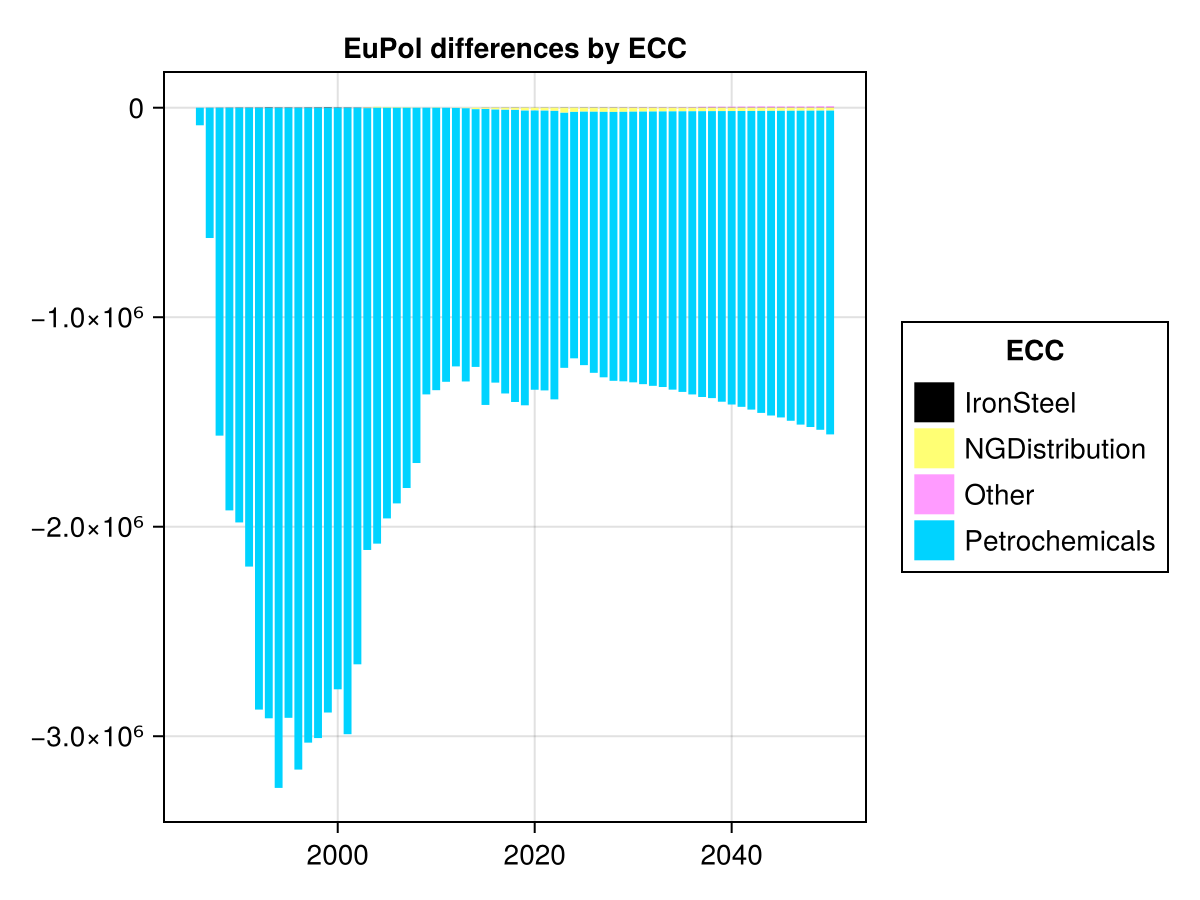

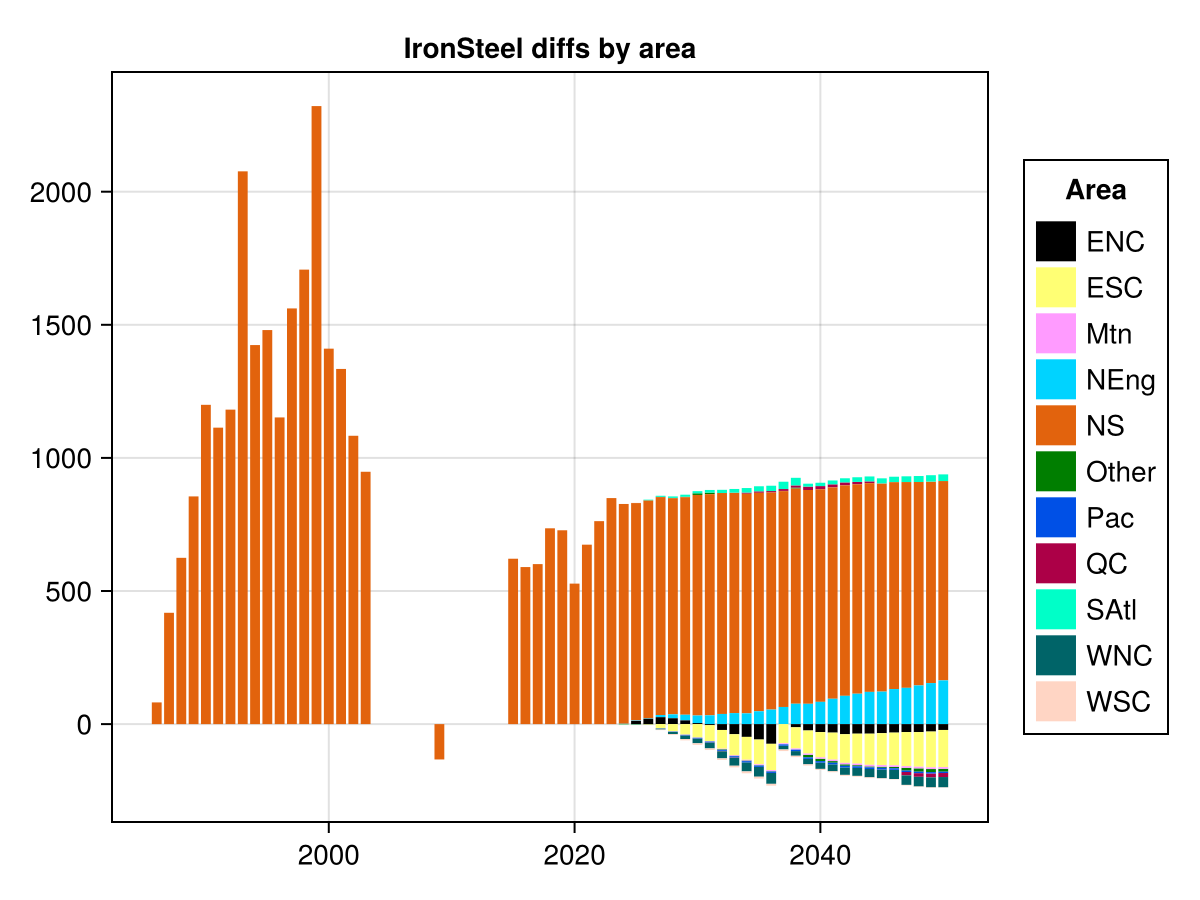

CairoMakie.Screen{IMAGE}


In [3]:
df = J.diff("EuPol", loc1, loc2)
@rsubset! df :Diff != 0
J.plot_diff(df; dim="ECC", num=3, title = "EuPol differences by ECC")
@rsubset! df :ECC == "IronSteel"
J.plot_diff(df; dim="Area", num=10, title = "IronSteel diffs by area")

In [4]:
@rsubset! df :Area == "NS" :Year <1987

Row,ECC,Poll,Area,Year,Updated,Official,Diff
,String,String,String,Int64,Float64?,Float64?,Float64
1,IronSteel,SOX,NS,1986,119.142,119.349,-0.206169
2,IronSteel,NOX,NS,1986,68.4864,77.5342,-9.0478
3,IronSteel,PMT,NS,1986,3.44818,3.86587,-0.417688
4,IronSteel,VOC,NS,1986,29.1959,35.083,-5.88717
5,IronSteel,N2O,NS,1986,5.04054,5.03571,0.00482464
6,IronSteel,COX,NS,1986,586.076,703.916,-117.841
7,IronSteel,CO2,NS,1986,1.84674e5,1.84458e5,215.391
8,IronSteel,CH4,NS,1986,13.6596,13.3134,0.346283
9,IronSteel,PM25,NS,1986,2.35029,2.75293,-0.402644


In [5]:
eufpol = J.diff("EuFPol", loc1, loc2)


fname is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\SOutput.dba
fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\SOutput.dba


Row,FuelEP,ECC,Poll,Area,Year,Updated,Official,Diff
,String,String,String,String,Int64,Float64?,Float64?,Float64
1,Ammonia,SingleFamilyDetached,SOX,ON,1985,0.0,0.0,0.0
2,Asphaltines,SingleFamilyDetached,SOX,ON,1985,0.0,0.0,0.0
3,AviationGasoline,SingleFamilyDetached,SOX,ON,1985,0.0,0.0,0.0
4,Biodiesel,SingleFamilyDetached,SOX,ON,1985,0.0,0.0,0.0
5,Biogas,SingleFamilyDetached,SOX,ON,1985,0.0,0.0,0.0
6,Biojet,SingleFamilyDetached,SOX,ON,1985,0.0,0.0,0.0
7,Biomass,SingleFamilyDetached,SOX,ON,1985,0.0,0.0,0.0
8,Coal,SingleFamilyDetached,SOX,ON,1985,0.0,0.0,0.0
9,Coke,SingleFamilyDetached,SOX,ON,1985,0.0,0.0,0.0


In [6]:
@rsubset! eufpol :Year < 1987 :Area == "NS" :ECC == "IronSteel" :Diff != 0
first(eufpol, 5)


Row,FuelEP,ECC,Poll,Area,Year,Updated,Official,Diff
,String,String,String,String,Int64,Float64?,Float64?,Float64
1,Diesel,IronSteel,SOX,NS,1986,0.81447,0.978713,-0.164243
2,Gasoline,IronSteel,SOX,NS,1986,0.207929,0.249859,-0.0419301
3,Diesel,IronSteel,NOX,NS,1986,21.1741,25.444,-4.26989
4,Gasoline,IronSteel,NOX,NS,1986,23.6933,28.4712,-4.77791
5,HFO,IronSteel,NOX,NS,1986,23.619,23.619,-1.90735e-6


In [7]:
@by(eufpol,
  :Poll,
  :Update = sum(:Updated),
  :Official = sum(:Official),
  :Diff = sum(:Diff))

Row,Poll,Update,Official,Diff
,String,Float64,Float64,Float64
1,SOX,1.0224,1.22857,-0.206173
2,NOX,68.4864,77.5342,-9.0478
3,PMT,3.44818,3.86587,-0.417688
4,VOC,29.1959,35.083,-5.88717
5,N2O,0.0852378,0.0804131,0.00482473
6,COX,586.076,703.916,-117.84
7,CO2,3805.19,3589.8,215.386
8,CH4,6.11773,5.77145,0.346283
9,PM25,2.35029,2.75293,-0.402644


In [8]:
@by(eufpol,
  :FuelEP,
  :Update = sum(:Updated),
  :Official = sum(:Official),
  :Diff = sum(:Diff))

Row,FuelEP,Update,Official,Diff
,String,Float64,Float64,Float64
1,Diesel,1090.64,1042.06,48.5807
2,Gasoline,3386.37,3353.45,32.9291
3,HFO,27.065,27.065,-2.17592e-6


In [9]:
eudem = J.diff("IOutput/EuDem", loc1, loc2);

fname is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\IOutput.dba
fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\IOutput.dba


In [10]:
@rsubset! eudem :Year < 1987 :Area == "NS" :EC == "IronSteel" :Diff != 0

Row,Enduse,FuelEP,EC,Area,Year,Updated,Official,Diff
,String,String,String,String,Int64,Float64?,Float64?,Float64
1,OffRoad,Diesel,IronSteel,NS,1986,0.0141012,0.013303,0.000798172
2,OffRoad,Gasoline,IronSteel,NS,1986,0.0380081,0.0358567,0.00215138


In [11]:
dmd = J.diff("IOutput/Dmd", loc1, loc2);


fname is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\IOutput.dba
fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\IOutput.dba


In [12]:
@rsubset! dmd :Year < 1987 :Area == "NS" :EC == "IronSteel" :Diff != 0

Row,Enduse,Tech,EC,Area,Year,Updated,Official,Diff
,String,String,String,String,Int64,Float64?,Float64?,Float64
1,OthSub,Electric,IronSteel,NS,1986,0.00029323,0.000322446,-2.92154e-5
2,OthNSub,Electric,IronSteel,NS,1986,0.00456472,0.00484013,-0.000275412
3,OffRoad,OffRoad,IronSteel,NS,1986,0.0521093,0.0491598,0.00294955


In [13]:
dmfrac = J.var("IOutput/DmFrac", loc1);
@rsubset! dmfrac :Year < 1987 :Area == "NS" :EC == "IronSteel"
dmfrac2 = J.var("IOutput/DmFrac", loc2);
@rsubset! dmfrac2 :Year < 1987 :Area == "NS" :EC == "IronSteel"
dmfrac3 = J.diff(dmfrac, dmfrac2; name1=loc1.name, name2=loc2.name)
@rsubset dmfrac3 :Diff != 0

fname is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\IOutput.dba
fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\IOutput.dba


Row,Enduse,Fuel,Tech,EC,Area,Year,Updated,Official,Diff
,String,String,String,String,String,Int64,Float64?,Float64?,Float64


In [14]:
DER = J.var("IOutput/DER", loc1);
@rsubset! DER :Year < 1987 :Area == "NS" :EC == "IronSteel"
DER2 = J.var("IOutput/DER", loc2);
@rsubset! DER2 :Year < 1987 :Area == "NS" :EC == "IronSteel"
DER3 = J.diff(DER, DER2; name1=loc1.name, name2=loc2.name)
@rsubset DER3 :Diff != 0

fname is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\IOutput.dba
fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\IOutput.dba


Row,Enduse,Tech,EC,Area,Year,Updated,Official,Diff
,String,String,String,String,Int64,Float64?,Float64?,Float64
1,OthSub,Electric,IronSteel,NS,1986,260.327,286.264,-25.9371
2,OthNSub,Electric,IronSteel,NS,1986,3966.57,4205.9,-239.323
3,Heat,Biomass,IronSteel,NS,1986,112.431,117.507,-5.07539
4,Heat,LPG,IronSteel,NS,1986,2661.8,2782.11,-120.312
5,OffRoad,OffRoad,IronSteel,NS,1986,59693.9,56315.0,3378.86


In [15]:
DERA = J.var("IOutput/DERA", loc1);
@rsubset! DERA :Year < 1987 :Area == "NS" :EC == "IronSteel"
DERA2 = J.var("IOutput/DERA", loc2);
@rsubset! DERA2 :Year < 1987 :Area == "NS" :EC == "IronSteel"
DERA3 = J.diff(DERA, DERA2; name1=loc1.name, name2=loc2.name)
@rsubset DERA3 :Diff != 0

fname is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\IOutput.dba
fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\IOutput.dba


Row,Enduse,Tech,EC,Area,Year,Updated,Official,Diff
,String,String,String,String,Int64,Float64?,Float64?,Float64
1,OthSub,Electric,IronSteel,NS,1986,26.0478,31.1986,-5.1508
2,OthNSub,Electric,IronSteel,NS,1986,233.483,286.508,-53.0251
3,Heat,Biomass,IronSteel,NS,1986,11.2478,15.0344,-3.78662
4,Heat,LPG,IronSteel,NS,1986,266.186,311.65,-45.4639
5,OffRoad,OffRoad,IronSteel,NS,1986,8490.07,6135.29,2354.79


In [16]:
DERR = J.var("IOutput/DERR", loc1);
@rsubset! DERR :Year < 1987 :Area == "NS" :EC == "IronSteel"
DERR2 = J.var("IOutput/DERR", loc2);
@rsubset! DERR2 :Year < 1987 :Area == "NS" :EC == "IronSteel"
DERR3 = J.diff(DERR, DERR2; name1=loc1.name, name2=loc2.name)
@rsubset DERR3 :Diff != 0

fname is: \\Silver\c\2020CanadaWalnut\2020Model\StartBase\IOutput.dba
fname is: \\Silver\c\24.11.15 2020CanadaWalnut\2020Model\StartBase\IOutput.dba


Row,Enduse,Tech,EC,Area,Year,Updated,Official,Diff
,String,String,String,String,Int64,Float64?,Float64?,Float64
1,OthSub,Electric,IronSteel,NS,1986,62.265,41.4786,20.7863
2,OthNSub,Electric,IronSteel,NS,1986,587.996,401.698,186.297
3,Heat,Biomass,IronSteel,NS,1986,17.9289,16.6401,1.28877
4,Heat,LPG,IronSteel,NS,1986,424.516,349.667,74.8486
5,OffRoad,OffRoad,IronSteel,NS,1986,7136.11,8160.19,-1024.08


In [1]:
nm = "PInv"
df = J.diff(nm, loc1, loc2);
@rsubset! df :Year < 1987 :EC == "IronSteel"


UndefVarError: UndefVarError: `J` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
df2 = J.var(nm, loc2);
@rsubset! df2 :Year < 1987 :EC == "IronSteel"
df3 = J.diff(df, df2; name1=loc1.name, name2=loc2.name)
@rsubset df3 :Diff != 0

In [ ]:
dmfrac = J.var("IOutput/DmFrac", loc1);
@rsubset! dmfrac :Year < 1987 :Area == "NS" :EC == "IronSteel"
dmfrac2 = J.var("IOutput/DmFrac", loc2);
@rsubset! dmfrac2 :Year < 1987 :Area == "NS" :EC == "IronSteel"
dmfrac3 = J.diff(dmfrac, dmfrac2; name1=loc1.name, name2=loc2.name)
@rsubset dmfrac3 :Diff != 0

In [ ]:
xProcSw = J.var("IInput/xProcSw", loc1)
@rsubset! xProcSw :Year < 1987